In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
pd.options.display.max_columns = 1000
from sklearn.metrics import mean_squared_error
import seaborn as sns

/anaconda3/envs/graphics2/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('/Users/ankushgarg/Documents/Social Network Analysis/datasets/movie_metadata.csv')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
new = df.dropna()

In [6]:
X = new[['num_critic_for_reviews','duration','director_facebook_likes', 'actor_3_facebook_likes','actor_1_facebook_likes', 'gross',
   'num_voted_users', 'cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes',
    'aspect_ratio', 'movie_facebook_likes']]

y = new[['imdb_score']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
lin_reg = LinearRegression()

In [9]:
lin_model = lin_reg.fit(X_train, y_train)

In [10]:
pred = lin_model.predict(X_test)

In [11]:
error = np.sqrt(mean_squared_error(y_test,pred))

In [12]:
print(error)

0.8937857710456045


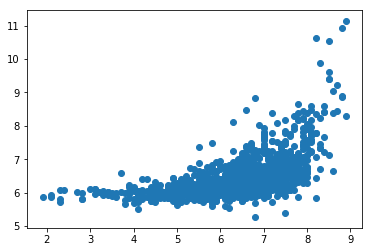

In [13]:
plt.scatter(y_test, pred)

In [14]:
diff = y_test - pred

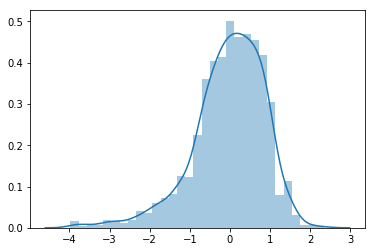

In [15]:
sns.distplot(diff)

In [16]:
test_list = []
for i, j in new.iterrows():
    dir_act_1 = (str(j['director_name']) + "|" + str(j['actor_1_name']) + "|" + str(j['movie_title']))
    test_list.append(dir_act_1)
    dir_act_2 = (str(j['director_name']) + "|" + str(j['actor_2_name'])+ "|" + str(j['movie_title']))
    test_list.append(dir_act_2)
    dir_act_3 = (str(j['director_name']) + "|" + str(j['actor_3_name']) + "|" + str(j['movie_title']))
    test_list.append(dir_act_3)

In [17]:
labels = ['director', 'actor', 'movie_title']
edge_list = pd.DataFrame(test_list, columns= ['object'])

In [18]:
edge_list['object'] = edge_list['object'].str.strip()
edge_list['object'] = edge_list['object'].str.strip(' ')

In [19]:
edge_list['director'] = edge_list.object.str.split('|', expand= True)[0]
edge_list['actor'] = edge_list.object.str.split('|', expand= True)[1]
edge_list['movie_title'] = edge_list.object.str.split('|', expand= True)[2]

In [20]:
edge_list.drop('object', inplace = True, axis = 1)

In [21]:
edge_list.head()

,director,actor,movie_title
0,James Cameron,CCH Pounder,Avatar
1,James Cameron,Joel David Moore,Avatar
2,James Cameron,Wes Studi,Avatar
3,Gore Verbinski,Johnny Depp,Pirates of the Caribbean: At World's End
4,Gore Verbinski,Orlando Bloom,Pirates of the Caribbean: At World's End


In [22]:
G = nx.from_pandas_dataframe(edge_list,source = 'director', target= 'actor', edge_attr= 'movie_title')

In [23]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 5925
Number of edges: 10402
Average degree:   3.5112


In [24]:
deg_cent = nx.degree_centrality(G)

max_deg_cemt = max(list(deg_cent.values()))

In [25]:
degrees = nx.degree(G)

max_deg = max(list(degrees.values()))

In [26]:
bet_cent = nx.betweenness_centrality(G)